
# This project classifies handwritten digits using the **MNIST dataset**.

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Loading the Dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [ ]:
print(f"Training data shape: {X_train.shape}, Labels shape: {y_train.shape}")
print(f"Training data shape: {X_test.shape}, Labels shape: {y_test.shape}")

Training data shape: (60000, 28, 28), Labels shape: (60000,)
Training data shape: (10000, 28, 28), Labels shape: (10000,)


 # Visualize some samples from the training data

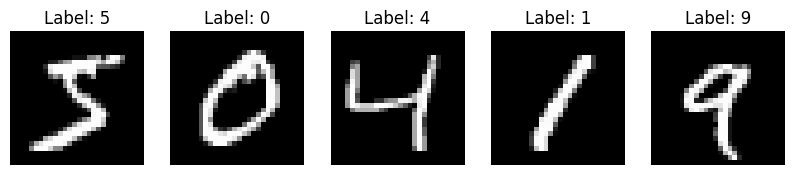

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for i in range(5):
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].set_title(f"Label: {y_train[i]}")
    axes[i].axis('off')
plt.show()

# Manually flatten the images from (28,28) to (784,)

In [ ]:
X_train_flattened = X_train.reshape(X_train.shape[0], 28 * 28).astype('float32')
X_test_flattened = X_test.reshape(X_test.shape[0], 28 * 28).astype('float32')


# Normalize pixel values to be between 0 and 1

In [ ]:
X_train_flattened /= 255.0
X_test_flattened /= 255.0

# Convert labels to **one-hot encoding**

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


# Build the model without a hidden layer

In [ ]:
model = Sequential([
    Dense(10, activation='softmax', input_shape=(784,))  # Output layer with 10 neurons for 10 classes
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#  Compile the model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the **model**

In [ ]:
model.fit(X_train_flattened, y_train, epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8017 - loss: 0.7720 - val_accuracy: 0.9114 - val_loss: 0.3182
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9087 - loss: 0.3316 - val_accuracy: 0.9195 - val_loss: 0.2860
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9183 - loss: 0.2941 - val_accuracy: 0.9232 - val_loss: 0.2757
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9246 - loss: 0.2753 - val_accuracy: 0.9247 - val_loss: 0.2709
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9215 - loss: 0.2722 - val_accuracy: 0.9274 - val_loss: 0.2668


# Evaluate the model on the test set

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_flattened, y_test, verbose=2)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

313/313 - 1s - 2ms/step - accuracy: 0.9255 - loss: 0.2696
Test Loss: 0.26963794231414795, Test Accuracy: 0.9254999756813049


 # Make predictions on some test samples

In [ ]:
predictions = np.argmax(model.predict(X_test_flattened[:5]), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [ ]:
print("Predicted labels:", predictions)
print("Actual labels:", np.argmax(y_test[:5], axis=1))

Predicted labels: [7 2 1 0 4]
Actual labels: [7 2 1 0 4]


# Visualising it

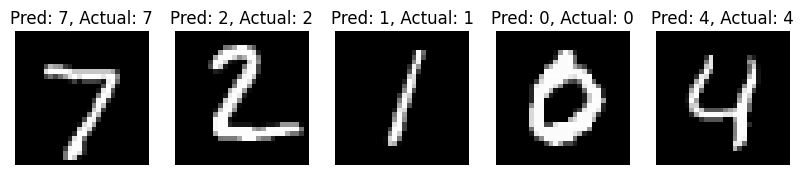

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for i in range(5):
    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].set_title(f"Pred: {predictions[i]}, Actual: {np.argmax(y_test[i])}")
    axes[i].axis('off')
plt.show()

# Model with One Hidden Layer and Keras Flatten Layer

In [ ]:
from tensorflow.keras.layers import Flatten


In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flattening the input using Keras' built-in Flatten layer
    Dense(128, activation='relu'),  # Hidden layer with ReLU activation
    Dense(10, activation='softmax')  # Output layer with softmax for 10 classes
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8146 - loss: 8.0147 - val_accuracy: 0.8785 - val_loss: 0.5143
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8958 - loss: 0.4374 - val_accuracy: 0.9227 - val_loss: 0.3374
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9242 - loss: 0.3122 - val_accuracy: 0.9233 - val_loss: 0.3437
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9315 - loss: 0.2710 - val_accuracy: 0.9277 - val_loss: 0.2952
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9421 - loss: 0.2297 - val_accuracy: 0.9333 - val_loss: 0.3194


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


313/313 - 1s - 2ms/step - accuracy: 0.9321 - loss: 0.3406
Test Loss: 0.3405775725841522, Test Accuracy: 0.9320999979972839


In [ ]:
predictions = np.argmax(model.predict(X_test[:5]), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [ ]:
print("Predicted labels:", predictions)
print("Actual labels:", np.argmax(y_test[:5], axis=1))


Predicted labels: [7 2 1 0 4]
Actual labels: [7 2 1 0 4]


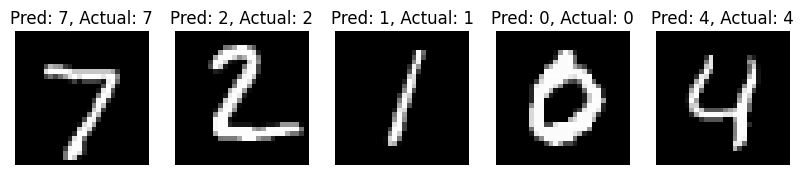

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for i in range(5):
    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].set_title(f"Pred: {predictions[i]}, Actual: {np.argmax(y_test[i])}")
    axes[i].axis('off')
plt.show()

# THANK YOU !!